In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint

from keras.utils import to_categorical
from keras.models import load_model
from keras.models import model_from_json

from keras.datasets import fashion_mnist

# 1. Params

In [2]:
img_row, img_col = 28, 28
INPUT_SHAPE = (img_row, img_col, 1) #1 for grayscaled images, 3 for RGB-images, channels per image
NUM_CLASS = 10 # 0 to 9
EPOCHS = 20

# 2. Loading Data

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 3. Preparation

In [4]:
# Respahping
# Target(60000,28,28,1)
x_train_res = X_train.reshape(X_train.shape[0], * INPUT_SHAPE)
x_test_res = X_test.reshape(X_test.shape[0], * INPUT_SHAPE)

# convert Datatype
x_train_res = x_train_res.astype("float32")
x_test_res = x_test_res.astype("float32")

# scaling 0-255 --> 0-1
x_train_res /= 255
x_test_res /= 255

# 4. Encoding

In [5]:
y_train_enc = tf.keras.utils.to_categorical(y_train, NUM_CLASS)
y_test_enc = tf.keras.utils.to_categorical(y_test, NUM_CLASS)

print(y_train_enc.shape)
print(y_test_enc.shape)

(60000, 10)
(10000, 10)


In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 5. Model Building

Model from http://l.web.umkc.edu/lizhu/publications/allerton14-cdnn.pdf 

Zejia Zheng, Zhu Li, Abhishek Nagar and Woosung Kang, "Compact Deep Convolutional Neural Networks for Image Classification"

In [9]:
# uncompacted Model
model = Sequential()

model.add(Conv2D(64, kernel_size = (5, 5), strides = (1, 1), padding = "same", activation = "relu", input_shape = INPUT_SHAPE))
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), strides = (1, 1), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"))
model.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"))

model.add(Flatten())
model.add(Dense(10, activation = "relu"))


# Output Layer
model.add(Dense(NUM_CLASS, activation = "softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        11,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,480 (560.47 KB)

 Trainable params: 143,480 (560.47 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compacted Model
model2 = Sequential()

model2.add(Conv2D(32, kernel_size = (5, 5), strides = (1, 1), padding = "same", activation = "relu", input_shape = INPUT_SHAPE))
model2.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model2.add(Conv2D(64, kernel_size = (5, 5), strides = (1, 1), padding = "same", activation = "relu"))
model2.add(MaxPool2D(pool_size = (3, 3), strides = (2, 2)))

model2.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"))
model2.add(Conv2D(32, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"))

model2.add(Flatten())
model2.add(Dense(10, activation = "relu"))


# Output Layer
model2.add(Dense(NUM_CLASS, activation = "softmax"))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        11,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,448 (357.22 KB)

 Trainable params: 91,448 (357.22 KB)

 Non-trainable params: 0 (0.00 B)

# 6. Compilation

In [11]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 7. Callbacks

In [12]:
my_callbacks_list = [EarlyStopping(min_delta = 0.0001, patience = 5),
                    #CSVLogger("./training.log"), 
                    ModelCheckpoint(filepath = "./CNN_models/model.{epoch:02d}-{val_loss:.2f}.keras")]

In [13]:
my_callbacks_list2 = [EarlyStopping(min_delta = 0.0001, patience = 5),
                    #CSVLogger("./training2.log"), 
                    ModelCheckpoint(filepath = "./CNN_models/model2.{epoch:02d}-{val_loss:.2f}.keras")]

# 8. Fitting

In [14]:
history = model.fit(x_train_res, y_train_enc, epochs = EPOCHS, batch_size = 128, validation_split = 0.1, verbose = 1, callbacks = my_callbacks_list)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5886 - loss: 1.1497 - val_accuracy: 0.8242 - val_loss: 0.4931
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8484 - loss: 0.4304 - val_accuracy: 0.8558 - val_loss: 0.4001
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8786 - loss: 0.3421 - val_accuracy: 0.8852 - val_loss: 0.3168
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8941 - loss: 0.2943 - val_accuracy: 0.8953 - val_loss: 0.2860
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9040 - loss: 0.2636 - val_accuracy: 0.8985 - val_loss: 0.2685
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9132 - loss: 0.2443 - val_accuracy: 0.9065 - val_loss: 0.2658
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9159 - loss: 0.2275 - val_accuracy: 0.8955 - val_loss: 0.2882
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9244 - loss: 0.2066 - 

In [15]:
history2 = model2.fit(x_train_res, y_train_enc, epochs = EPOCHS, batch_size = 128, validation_split = 0.1, verbose = 1, callbacks = my_callbacks_list2)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5277 - loss: 1.3548 - val_accuracy: 0.7768 - val_loss: 0.5488
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8433 - loss: 0.4437 - val_accuracy: 0.8820 - val_loss: 0.3238
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8872 - loss: 0.3238 - val_accuracy: 0.8937 - val_loss: 0.3042
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8986 - loss: 0.2867 - val_accuracy: 0.8893 - val_loss: 0.3096
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9059 - loss: 0.2650 - val_accuracy: 0.8987 - val_loss: 0.2854
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9132 - loss: 0.2402 - val_accuracy: 0.9092 - val_loss: 0.2546
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9216 - loss: 0.2153 - val_accuracy: 0.9023 - val_loss: 0.2682
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9222 - loss: 0.2113 - 

# 9. Plotting the Metrics

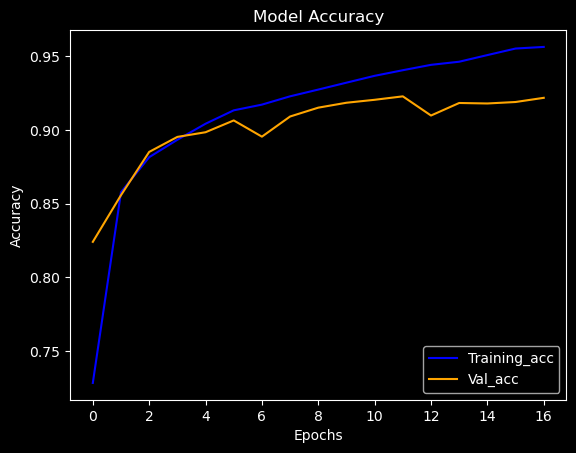

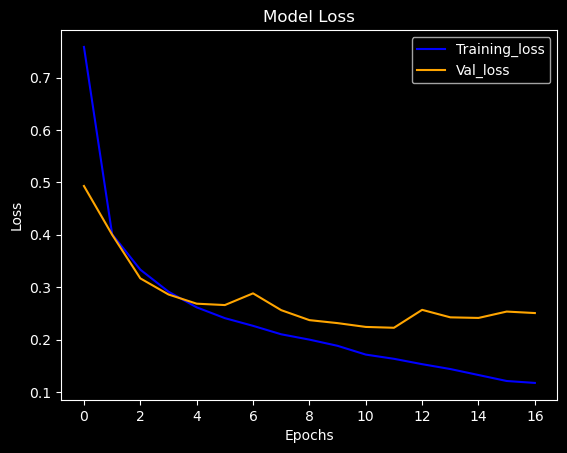

In [16]:
plt.style.use("dark_background")

# plot the Accuracy
plt.plot(history.history["accuracy"], color = "blue")
plt.plot(history.history["val_accuracy"], color = "orange")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Val_acc"] , loc = "lower right")
plt.show()

# plot the Loss
plt.plot(history.history["loss"], color = "blue")
plt.plot(history.history["val_loss"],color = "orange")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training_loss", "Val_loss"] , loc = "upper right")
plt.show()

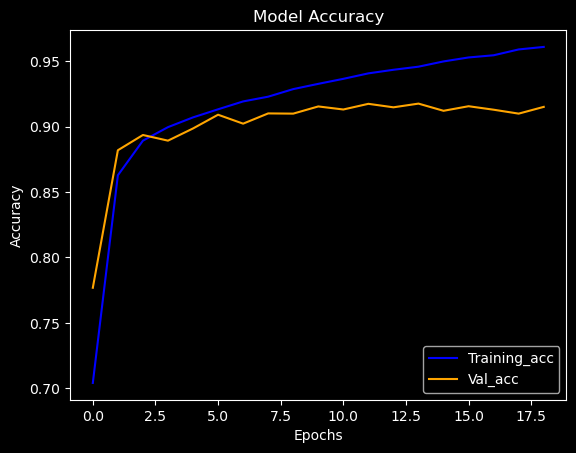

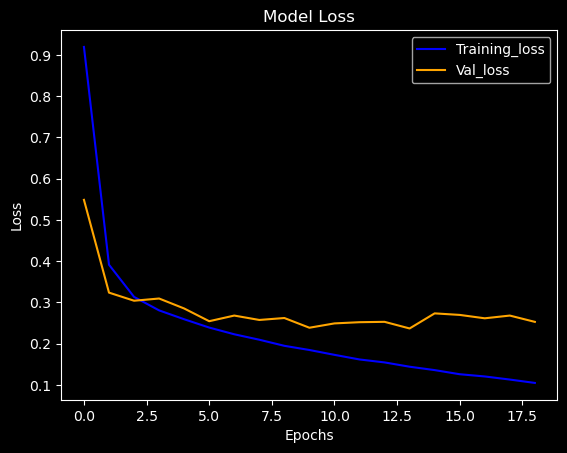

In [17]:
plt.style.use("dark_background")

# plot the Accuracy
plt.plot(history2.history["accuracy"], color = "blue")
plt.plot(history2.history["val_accuracy"], color = "orange")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Val_acc"] , loc = "lower right")
plt.show()

# plot the Loss
plt.plot(history2.history["loss"], color = "blue")
plt.plot(history2.history["val_loss"],color = "orange")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training_loss", "Val_loss"] , loc = "upper right")
plt.show()

# 10. Evaluation

In [18]:
result = model.evaluate(x_test_res,y_test_enc, batch_size = 128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9156 - loss: 0.2758


In [19]:
result = model2.evaluate(x_test_res,y_test_enc, batch_size = 128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9103 - loss: 0.2779


# 11. Predictions

In [20]:
predictions = model.predict(x_test_res, batch_size = 128, verbose = 1)
rounded_preds = np.argmax(predictions, axis = 1)
# rounded_preds = np.round(predictions)
for i in rounded_preds:
    print(i)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
9
2
1
1
6
1
4
6
5
7
4
5
5
3
4
1
2
4
8
0
2
5
7
5
1
2
6
0
9
3
8
8
3
3
8
0
7
5
7
9
0
1
6
9
6
7
2
1
2
2
4
4
5
8
2
2
8
4
8
0
7
7
8
5
1
1
2
4
7
8
7
0
2
2
2
3
1
2
8
4
1
8
5
9
5
0
3
2
0
2
5
3
6
7
1
8
0
1
2
2
3
6
7
2
7
8
5
7
9
4
2
5
7
0
5
2
8
4
7
8
0
0
9
9
3
0
8
4
1
5
4
1
9
1
8
4
2
1
2
5
1
0
0
0
1
6
1
3
2
2
3
4
1
3
5
2
4
7
9
3
7
2
3
9
0
9
4
7
4
2
0
5
2
1
2
1
3
0
9
1
0
9
3
6
7
9
9
4
4
7
1
2
1
6
3
2
8
3
6
1
1
0
2
9
2
4
0
7
9
8
4
1
8
4
1
3
1
6
7
2
8
5
2
0
7
7
6
2
7
6
7
8
9
2
9
0
5
1
4
4
5
6
9
2
2
8
6
4
2
2
9
7
6
5
5
4
8
5
2
3
0
4
8
0
0
6
4
8
9
6
1
3
0
2
3
0
8
3
7
4
0
1
6
3
0
6
6
7
5
4
5
9
5
6
5
5
1
9
8
8
3
3
6
8
0
0
2
9
7
7
1
3
6
4
2
4
7
1
6
4
8
2
6
5
4
4
7
7
7
3
3
7
2
7
1
3
7
2
2
3
4
0
3
1
6
1
9
4
9
9
1
7
8
3
6
0
2
4
8
0
1
2
2
4
4
7
3
2
2
5
0
7
9
4
0
9
3
9
3
2
5
6
0
3
5
8
1
6
2
2
6
4
7
5
2
0
4
6
1
2
0
9
7
0
3
4
2
6
2
1
6
6
7
2
9
4
2
1
5
4
5
3
8
5
8
4
4
8
9
8
6
2
4
4
2
4
1
6
1
3
0
7
8
8
4
5
3
1
9
5
3
3
0
1
2
2
9
4
0
2
0
4
2
0
0
3
3
8
2
8
9
4
0
7
2
4
6
9
4
9


In [24]:
predictions2 = model2.predict(x_test_res, batch_size = 128, verbose = 1)
rounded_preds2 = np.argmax(predictions2, axis = 1)
# rounded_preds = np.round(predictions)
for i in rounded_preds2:
    print(i)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
9
2
1
1
0
1
4
6
5
7
4
5
5
3
4
1
2
4
8
0
2
5
7
5
1
6
6
6
9
3
8
8
1
3
8
0
7
5
7
9
0
1
6
9
6
7
2
1
2
2
4
4
5
8
2
2
8
4
8
0
7
7
8
5
1
1
2
4
7
8
7
0
2
6
2
3
1
2
8
4
1
8
5
9
5
0
3
2
0
6
5
3
6
7
1
8
0
1
4
2
3
6
7
2
7
8
5
9
9
4
2
5
7
0
5
2
8
4
7
8
0
0
9
9
3
0
8
4
1
5
4
1
9
1
8
4
2
1
2
5
1
6
0
0
1
6
1
3
2
2
3
4
1
3
5
0
4
7
9
3
7
2
3
9
0
9
4
7
4
2
6
5
2
1
2
1
3
0
9
1
0
9
3
6
7
9
9
4
4
7
1
2
1
6
3
2
8
3
6
1
1
0
2
9
2
4
0
7
9
8
4
1
8
4
1
3
1
6
7
2
8
5
3
6
7
7
6
2
7
0
7
8
9
2
9
0
5
1
4
4
5
6
9
2
2
8
6
2
6
2
9
7
6
5
5
2
8
5
2
3
0
4
8
0
0
6
4
8
9
0
1
6
0
2
3
0
8
3
7
4
0
1
6
3
0
6
0
7
5
4
5
9
5
6
5
5
1
9
8
8
3
3
6
8
0
0
2
9
7
7
1
3
6
6
2
4
7
1
6
4
8
2
6
5
6
6
7
7
7
3
3
7
0
7
1
3
7
2
2
3
4
0
3
1
6
1
9
4
9
9
1
7
8
3
6
0
2
4
8
0
1
6
2
4
4
7
3
2
2
5
0
7
9
4
0
9
3
9
3
2
5
6
0
3
5
8
1
6
2
6
6
4
9
5
2
0
6
6
1
2
0
9
7
0
4
4
6
6
2
1
6
6
7
0
9
4
2
1
5
4
5
3
8
5
8
4
4
8
9
8
6
2
4
4
2
4
1
4
1
3
0
7
8
8
6
5
3
1
9
5
3
3
6
1
6
4
9
2
0
6
0
4
2
0
0
3
3
8
2
8
9
4
0
7
6
4
4
9
2
9


# 12. Confusion Matrix

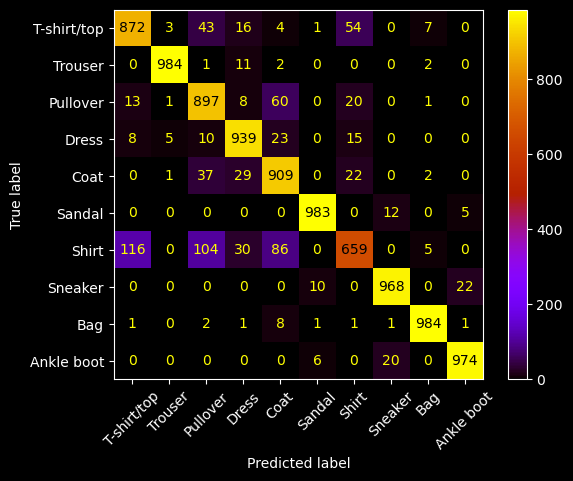

In [25]:
cm = confusion_matrix(y_test, rounded_preds)
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
plt.style.use("dark_background")
disp.plot(cmap = plt.cm.gnuplot)
plt.xticks(rotation = 45)
plt.show()

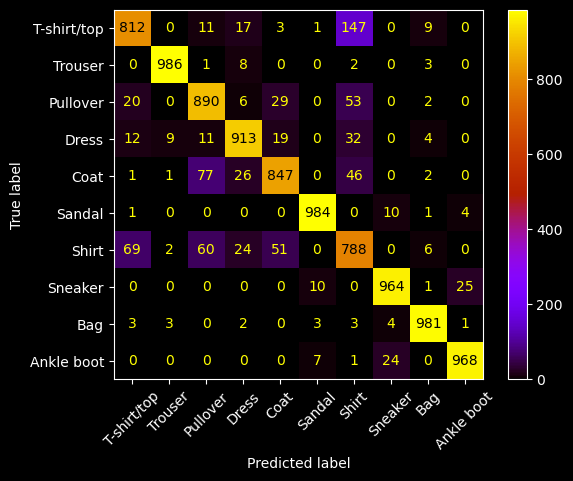

In [26]:
cm2 = confusion_matrix(y_test, rounded_preds2)
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = labels)
plt.style.use("dark_background")
disp2.plot(cmap = plt.cm.gnuplot)
plt.xticks(rotation = 45)
plt.show()

# 13. Savings

In [32]:
model.save("./CNN_saves/mnist_fashion_1.keras")
model.save_weights("./CNN_saves/mnist_fashion_1.weights.h5")
json_string = model.to_json()
with open("./CNN_models/network.json", "w") as file:
    json.dump(json_string, file)

In [33]:
model2.save("./CNN_saves/mnist_fashion_2.keras")
model2.save_weights("./CNN_saves/mnist_fashion_2.weights.h5")
json_string2 = model2.to_json()
with open("./CNN_models/network.json", "w") as file:
    json.dump(json_string2, file)